## Unit 2: Missing Data - Imputation Techniques 

### Team: Hieu Nguyen, Nithya Devadoss, Ramesh Simhambhatla, Ramya Mandava
### Date: 11/04/2018

## Abstract

In Statistics, to create meaningful model, a tidy or clean data set is extremely important. So, data examination and cleaing is the pre-face of any modelling activity. Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. In this exercise, we would experiment with data imputation process of replacing missing data with substituted values using the Boston Housing Dataset. The data consists of 506 observations of price of houses in various places in Boston. We would then apply different types of missingness, such as Missing Completely at Random (MACR), Missing at Random (MAR) and Missing Not at Random (MNAR) to compare the (linear) model performance in predicting Boston Housing prices.

## Introduction

To experiment with types of missingness and model performance, we would use Boston Housing dataset available in sklearn package. The data set has 506 observations and 13 attributes. This data set do not have any missing data, so we would experiment with forcebly imputing missing values with multiple scenarios.

Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population

### STEP1: 

#### Using Sklearn, get the Boston Housing Dataset. Fit a Linear Regressor to the data as a baseline. There is no need to do cross-validation. We are exploring the change in results. What is the loss and what are the goodness of fit parameters? This will be our baseline for comparison.

In this excercise, we will use Python libraries to load and maninpuate data, and to run the model.

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df1 = bos[bos.isnull().any(axis=1)]
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


The data set doesn't have any missing data in the data set to begin with.

In [5]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

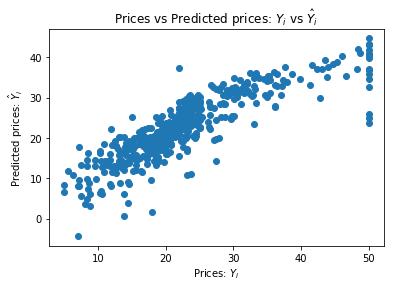

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = bos.iloc[:,0:-1]  #iloc gives the positional locations, so 'all rows' and 'all but the last column'
Y_true = bos.iloc[:,-1] 
lm.fit(X,Y_true)

Y_pred = lm.predict(X)

plt.scatter(Y_true, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [8]:
lm.score(X,Y_true)

0.7406077428649427

The model without any changes to existing data set showing a $R^{2}$= 0.7406077428649427 (Goodness of Fit)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: ", mean_squared_error(Y_pred,Y_true))
print("MAE: ", mean_absolute_error(Y_pred,Y_true))
#lm.score(X,Y_true)

MSE:  21.897779217687496
MAE:  3.2729446379969227


Mean Squared Error (MSE) and Mean Absolute Error (MAE) are the measure of loss or the differece between a target value and prediction of the variable.

### In the exercise, we would take these values as baseline to compare with upcoming tests when we experiment with various scenarios of missing types.

### STEP 2: (Repeat)
### Missing Completely at Random (MCAR)

#### For select between 1, 5, 10, 20, 33 and 50% of your data on a single column (Completely at Random), replace the present value with a NAN and then perform an imputation of that value. In each case, perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

In this section, we will experiment with imputing data to **AGE** feature by replacing the data limiting to different number of instances.

**Missing Completely at Random (MCAR)** exists when missing values are randomly distributed across all observations. Missingness in given variable does not depend on any other variable, whether observed or unobserved.

In [10]:
import random
random.random()

0.2268808533090937

In [11]:
X.shape[0]

506

In [12]:
df1 = X[X.isnull().any(axis=1)]
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


For 1% of the data selection 

In [18]:
from sklearn.linear_model import LinearRegression
limit1 = [0.01,0.05,0.1,0.2,0.33,0.5]
MSE = []
MAE = []
Scr = []

C:\Users\NithyaDoss\Anaconda3\envs\python2x\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\NithyaDoss\Anaconda3\envs\python2x\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


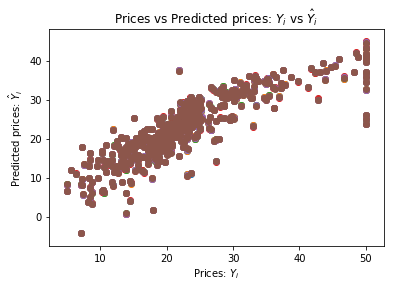

In [19]:
X_age = X
for j in range(0,len(limit1)):
    for i in range(X_age.shape[0]):
        miss_1 = random.random()
        #miss_2 = random.random()
        if miss_1 < limit1[j]:
            X_age.iloc[i,6] = np.nan
    X_age.loc[X_age.iloc[:,6].isna(),'AGE'].shape
    sub = X_age['AGE'].median()
    X_age.loc[X_age.iloc[:,6].isna(),'AGE'] = sub
    lm.fit(X_age,Y_true)
    Y_pred = lm.predict(X_age)
    plt.scatter(Y_true, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    MSE.append(mean_squared_error(Y_pred,Y_true))
    MAE.append(mean_absolute_error(Y_pred,Y_true))
    Scr.append(lm.score(X_age,Y_true))
    
   # cnt += 1    plt.subplot(7, 1, cnt)    plt.axis([10, 50, 0, 40])


In [41]:
for i in range(0,len(MSE)):
    print 'The Mean Squared Error for ->MCAR',int(limit1[i]*100), '% of data selected is',MSE[i]

The Mean Squared Error for ->MCAR 1 % of data selected is 21.896927216332855
The Mean Squared Error for ->MCAR 5 % of data selected is 21.896642657415423
The Mean Squared Error for ->MCAR 10 % of data selected is 21.894902942242854
The Mean Squared Error for ->MCAR 20 % of data selected is 21.872657268124676
The Mean Squared Error for ->MCAR 33 % of data selected is 21.89314125501161
The Mean Squared Error for ->MCAR 50 % of data selected is 21.87804620409578


In [42]:
for i in range(0,len(MAE)):
    print 'The Mean Absolute Error for ->MCAR',int(limit1[i]*100), '% of data selected is',MAE[i]


The Mean Absolute Error for ->MCAR 1 % of data selected is 3.2733948553747956
The Mean Absolute Error for ->MCAR 5 % of data selected is 3.273576810888282
The Mean Absolute Error for ->MCAR 10 % of data selected is 3.272185909046397
The Mean Absolute Error for ->MCAR 20 % of data selected is 3.271217665177321
The Mean Absolute Error for ->MCAR 33 % of data selected is 3.270206346128199
The Mean Absolute Error for ->MCAR 50 % of data selected is 3.269255826557974


In [43]:
for i in range(0,len(Scr)):
    print 'The Score for ->MCAR',int(limit1[i]*100), '% of data selected is',Scr[i]

The Score for ->MCAR 1 % of data selected is 0.7406178353292181
The Score for ->MCAR 5 % of data selected is 0.740621206099338
The Score for ->MCAR 10 % of data selected is 0.7406418140633192
The Score for ->MCAR 20 % of data selected is 0.7409053273430742
The Score for ->MCAR 33 % of data selected is 0.740662682299442
The Score for ->MCAR 50 % of data selected is 0.7408414921819282


#### Compared to baseline statistics (Baseline: $R^{2}$: 0.7406077428649427; MSE:  21.897779217687496; MAE:  3.2729446379969227), we did not observe very significant loss or change in goodness of fit test while implementing imputation for Missing Completely at Random (MCAR) experiments on feature 'Age'.

### Step 3: 
### Missing at Random (MAR)
#### Take 2 different columns and create data "Missing at Random" when controlled for a third variable (i.e., if variable Z > 30%,  then variable X, Y are randomly missing). Make runs 10, 20 and 30% missing data imputed via your best guess. Repeat your fit and comparison to baseline.

In this section, we will experiment with imputing data for **NOX and DIS** features when **CHAS = 1** by replacing the data limiting to number of instances - 10%, 20%, and 30%. 

**Missing at Random (MAR)** data reflect a systematic rather than random pattern of missingness with our controlled variable CHAS==1.

In [35]:
X_twocol = X
X2 = X_twocol[X_twocol['CHAS']==1]

In [36]:
limit2 = [0.1,0.2,0.3]
MSE1 = []
MAE1 = []
Scr1 = []
for j in range(0,len(limit2)):
    for i in range(X2.shape[0]):
        miss_1 = random.random()
        miss_2 = random.random()
        if miss_1 < limit2[j]:
            X2.iloc[i,4] = np.nan

        if miss_2 < limit:
            X2.iloc[i,7] = np.nan
    X_twocol[X_twocol['CHAS']==1] = X2
    X_twocol.loc[X_twocol.iloc[:,4].isna(),'NOX'].shape
    sub = X_twocol['NOX'].mean()
    X_twocol.loc[X_twocol.iloc[:,4].isna(),'NOX'] = sub
    sub = X_twocol['DIS'].mean()
    X_twocol.loc[X_twocol.iloc[:,7].isna(),'DIS'] = sub
    lm.fit(X_twocol,Y_true)
    Y_pred = lm.predict(X_twocol)
    #plt.scatter(Y_true, Y_pred)
    #plt.xlabel("Prices: $Y_i$")
    #plt.ylabel("Predicted prices: $\hat{Y}_i$")
    #plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    Scr1.append(lm.score(X_twocol,Y_true))
    MSE1.append(mean_squared_error(Y_pred,Y_true))
    MAE1.append(mean_absolute_error(Y_pred,Y_true))

C:\Users\NithyaDoss\Anaconda3\envs\python2x\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\NithyaDoss\Anaconda3\envs\python2x\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\NithyaDoss\Anaconda3\envs\python2x\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [39]:
for i in range(0,len(MSE1)):
    print 'The Mean Squared Error for ->MAR',int(limit2[i]*100), '% of data selected is',MSE1[i]

The Mean Squared Error for ->MAR 10 % of data selected is 22.143746822120363
The Mean Squared Error for ->MAR 20 % of data selected is 22.303193759305273
The Mean Squared Error for ->MAR 30 % of data selected is 22.48494614486322


In [40]:
for i in range(0,len(MAE1)):
    print 'The Mean Absolute Error for ->MAR',int(limit2[i]*100), '% of data selected is',MAE1[i]

The Mean Absolute Error for ->MAR 10 % of data selected is 3.2723355043652274
The Mean Absolute Error for ->MAR 20 % of data selected is 3.2708843624849386
The Mean Absolute Error for ->MAR 30 % of data selected is 3.289969043977165


for i in range(0,len(Scr1)):
    print 'The Score for ->MAR',int(limit2[i]*100), '% of data selected is',Scr1[i]

#### Compared to baseline statistics (Baseline: $R^{2}$: 0.7406077428649427; MSE:  21.897779217687496; MAE:  3.2729446379969227), we did observe slight increase in loss of (MSE), no significant loss of (MAE) and slight decrease in goodness of fit test while implementing imputation for Missing at Random (MAR) experiments on features NOX and DIS with CHAS as controlling feature.

## Step 4:
## Missing Not at Random

#### Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline

In this section, we will experiment with imputing data to RM (average Room Size) feature by replacing upto 25% of the obsersations.

**Missing Not at Random** happens when missingness depends at least in part on unobserved variables

In [45]:
#5.885500 - Missing at Not Random
X_rm = X
#X2 = X_rm[X_twocol['CHAS']==1]

In [46]:
len(X[X['RM']<5.8855])

127

In [47]:
X2 = X_rm[X_rm['RM']<=6.208]

In [48]:
limit = .25
for i in range(X2.shape[0]):
    miss_1 = random.random()
    print(miss_1)
    if miss_1 < limit:
        X2.iloc[i,5] = np.nan

0.625215613898
0.161858793337
0.04453729814


C:\Users\NithyaDoss\Anaconda3\envs\python2x\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.302362109816
0.0520874054154
0.445742029015
0.165003639299
0.413461040718
0.743416569042
0.721621435237
0.0959558557612
0.139172416282
0.672432300821
0.200113367627
0.574052633491
0.642453332295
0.0627098113857
0.677087332901
0.776187587962
0.614347452956
0.0796040205304
0.17547063553
0.537643213628
0.462399554143
0.576034085117
0.268038930535
0.912728036281
0.693184105845
0.183487253058
0.167373301739
0.628973479133
0.238458013307
0.934206785174
0.445520429318
0.173469106955
0.42540699498
0.225959534074
0.861548130703
0.612466934757
0.935563412411
0.368600572764
0.0701410310237
0.612341130546
0.887685477976
0.058422766298
0.228229317275
0.960073761977
0.775764565764
0.729869009766
0.947299925504
0.742951156306
0.748073151019
0.841141842888
0.915163718686
0.355676004883
0.503989262755
0.464231127614
0.408831383175
0.389324434288
0.832610551745
0.558116123338
0.897958305728
0.618104481805
0.0564084715964
0.428449179968
0.274894554654
0.459765466436
0.33329172765
0.927580974595
0.53939

In [120]:
X_rm[X_rm['RM']<=6.208] = X2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2534: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self

In [49]:
sub =  X_rm['RM'].mean()
X_rm.loc[X_rm.iloc[:,5].isna(),'RM'] = sub

C:\Users\NithyaDoss\Anaconda3\envs\python2x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

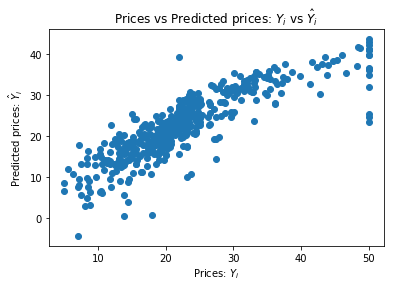

In [50]:
from sklearn.linear_model import LinearRegression

lm.fit(X_rm,Y_true)

Y_pred = lm.predict(X_rm)

plt.scatter(Y_true, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [51]:
lm.score(X_rm,Y_true)
print 'The Score for ->MNAR',lm.score(X_rm,Y_true)

The Score for ->MNAR 0.7336524003600671


In [47]:
print("Mean Squared Error (MSE):", mean_squared_error(Y_pred,Y_true))
print("Mean Absolute Error (MAE):",mean_absolute_error(Y_pred,Y_true))

Mean Squared Error (MSE): 21.897779217687496
Mean Absolute Error (MAE): 3.2729446379969227


#### Compared to baseline statistics (Baseline: $R^{2}$: 0.7406077428649427; MSE:  21.897779217687496; MAE:  3.2729446379969227), we did observe no siginficant change in loss to both MSE and MAE, and slight decrease in goodness of fit test while implementing imputation for Missing Not at Random (MNAR) experiment on RM (<= 6.208) feature by imputing missing data into approximately 25% of observations.

### Conclusion

### References
Loss
https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

Goodness of fit
http://www.medicine.mcgill.ca/epidemiology/joseph/courses/EPIB-621/fit.pdf